# Plot the PAGES2k network on a map

In this notebook, we demonstrate how to plot the PAGES2k network on a map.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import os
import numpy as np

In [2]:
# load the pickled dataframe of the PAGES2k dataset
df = pd.read_pickle('./data/pages2k_dataset.pkl')

In [3]:
# a bunch of PAGES2k style settings
class PAGES2k(object):
    archive_types = ['bivalve',
                    'borehole',
                    'coral',
                    'documents',
                    'glacier ice',
                    'hybrid',
                    'lake sediment',
                    'marine sediment',
                    'sclerosponge',
                    'speleothem',
                    'tree',
                    ]
    markers = ['p', 'p', 'o', 'v', 'd', '*', 's', 's', '8', 'D', '^']
    markers_dict = dict(zip(archive_types, markers))
    
    colors = [np.array([ 1.        ,  0.83984375,  0.        ]),
              np.array([ 0.73828125,  0.71484375,  0.41796875]),
              np.array([ 1.        ,  0.546875  ,  0.        ]),
              np.array([ 0.41015625,  0.41015625,  0.41015625]),
              np.array([ 0.52734375,  0.8046875 ,  0.97916667]),
              np.array([ 0.        ,  0.74609375,  1.        ]),
              np.array([ 0.25390625,  0.41015625,  0.87890625]),
              np.array([ 0.54296875,  0.26953125,  0.07421875]),
              np.array([ 1         ,           0,           0]),
              np.array([ 1.        ,  0.078125  ,  0.57421875]),
              np.array([ 0.1953125 ,  0.80078125,  0.1953125 ])]
    colors_dict = dict(zip(archive_types, colors))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

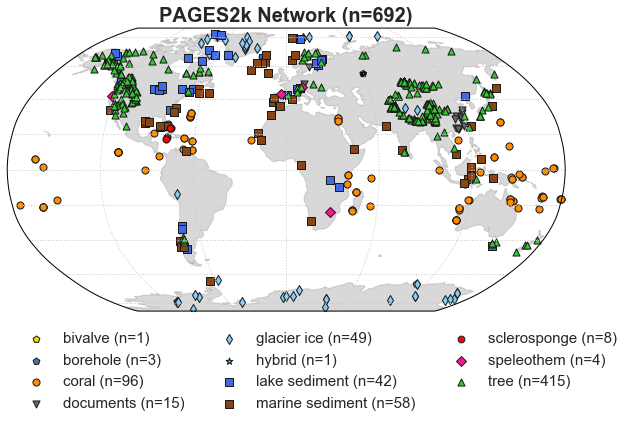

In [4]:
# now let's plot the map
p = PAGES2k()

sns.set(style='ticks', font_scale=2)

fig = plt.figure(figsize=[10, 8])
ax = plt.subplot(projection=ccrs.Robinson())

ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
ax.gridlines(edgecolor='gray', linestyle=':')

ax.set_title(f'PAGES2k Network (n={len(df)})', fontsize=20, fontweight='bold')

s_plots = []
type_names = []
df_archiveType_set = np.unique(df['archiveType'])
for type_name in df_archiveType_set:
    selector = df['archiveType'] == type_name
    type_names.append(f'{type_name} (n={len(df[selector])})')
    s_plots.append(
        ax.scatter(
            df[selector]['geo_meanLon'], df[selector]['geo_meanLat'],
            marker=p.markers_dict[type_name],
            c=p.colors_dict[type_name], edgecolor='k',
            s=50, transform=ccrs.Geodetic(),
        )
    )
    
lgnd = plt.legend(
    s_plots, type_names,
    scatterpoints=1,
    bbox_to_anchor=(0, -0.4),
    loc='lower left',
    ncol=3,
    fontsize=15,
    frameon=False,
)

# save the figure
# fig.savefig('./figs/pages2k_network.pdf', bbox_inches='tight')  # save as PDF
fig.savefig('./figs/pages2k_network.png', bbox_inches='tight')  # save as PNG